In [79]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   'text.usetex': False,
   }
plt.rcParams.update(params)

In [114]:
def plothistograms(MRE_om,chisq_om,bins=50):
    # plot histograms giving MRE and chisq for >20 day Prot [0,:] and all Prots [1,:]
    sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
    
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,1)
    bins_val=np.linspace(min(MRE_om[0,:]),max(MRE_om[0,:]),bins)
    sns.distplot(MRE_om[0,:],bins=bins_val,color='k',kde_kws = {'shade': True, 'linewidth': 3},label='MRE for Prot>20')
    plt.title('mean: %.2f, std:%.2f'%(np.mean(MRE_om[0,:]),np.std(MRE_om[0,:])),fontsize=25)
    plt.xlabel('Median Relative Error')
    plt.legend()
    plt.subplot(2,2,2)
    bins_val=np.linspace(min(MRE_om[1,:]),max(MRE_om[1,:]),bins)
    sns.distplot(MRE_om[1,:],bins=bins_val,color='k',kde_kws = {'shade': True, 'linewidth': 3},label='All Prot') 
    plt.title('mean: %.2f, std:%.2f'%(np.mean(MRE_om[1,:]),np.std(MRE_om[1,:])),fontsize=25)
    plt.xlabel('Median Relative Error')
    plt.legend()
    plt.subplot(2,2,3)
    bins_val=np.linspace(min(chisq_om[0,:]),max(chisq_om[0,:]),bins)
    sns.distplot(chisq_om[0,:],bins=bins_val,color='k',kde_kws = {'shade': True, 'linewidth': 3},label='Prot>20')
    plt.title('mean: %.2f, std:%.2f'%(np.mean(chisq_om[0,:]),np.std(chisq_om[0,:])),fontsize=25)
    plt.xlabel('$\chi^2$')
    plt.legend()
    plt.subplot(2,2,4)
    bins_val=np.linspace(min(chisq_om[1,:]),max(chisq_om[1,:]),bins)
    sns.distplot(chisq_om[1,:],bins=bins_val,color='k',kde_kws = {'shade': True, 'linewidth': 3},label='All Prot')  
    plt.title('mean: %.2f, std:%.2f'%(np.mean(chisq_om[1,:]),np.std(chisq_om[1,:])),fontsize=25)
    plt.xlabel('$\chi^2$')
    plt.legend()

    print('Average MRE for Prots>20days is %.3f +/- %.3f'%(np.mean(MRE_om[0,:]),np.std(MRE_om[0,:])))
    print('Average average chisq for Prots>20days is %.2f +/- %.2f'%(np.mean(chisq_om[0,:]),np.std(chisq_om[0,:])))
    print('Average MRE for all Prot is %.3f +/- %.3f'%(np.mean(MRE_om[1,:]),np.std(MRE_om[1,:])))
    print('Average average chisq for all Prots is %.2f +/- %.2f'%(np.mean(chisq_om[1,:]),np.std(chisq_om[1,:])))


Train with and w/o cool stars from Santo's 2019 paper

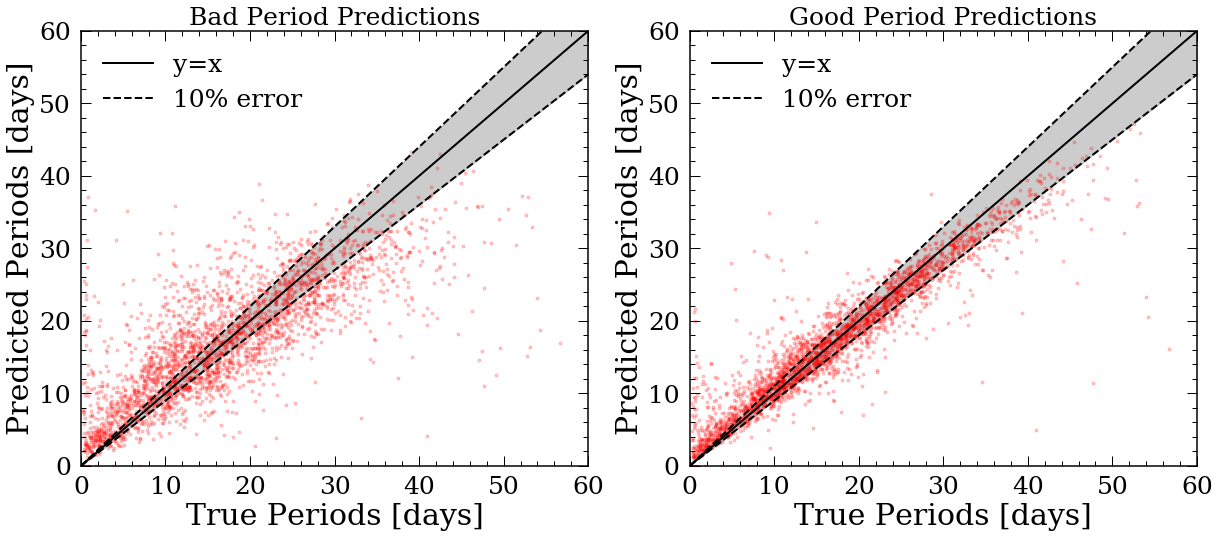

In [39]:
df_train=pd.read_pickle('CoolStarTrainings.pkl')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(df_train.Prot,df_train.Prediction_bad,'r.', alpha=0.2)
plt.plot([0,60],[0,60],'k-',label='y=x')
# fill 10%
plt.plot([0,60],[0,0.9*60],'k--')
plt.plot([0,60],[0,1.1*60],'k--',label='10% error')
plt.fill_between([0,60], [0,0.9*60], [0,1.1*60], color='black', alpha='0.2')

plt.ylim([0,60])
plt.xlim([0,60])
plt.title('Bad Period Predictions',fontsize=25)
plt.ylabel('Predicted Periods [days]')
plt.xlabel('True Periods [days]')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_train.Prot,df_train.Prediction_good,'r.',alpha=0.2)
plt.plot([0,60],[0,60],'k-',label='y=x')
# fill 10%
plt.plot([0,60],[0,0.9*60],'k--')
plt.plot([0,60],[0,1.1*60],'k--',label='10% error')
plt.fill_between([0,60], [0,0.9*60], [0,1.1*60], color='black', alpha='0.2')

plt.ylim([0,60])
plt.xlim([0,60])
plt.title('Good Period Predictions',fontsize=25)
plt.ylabel('Predicted Periods [days]')
plt.xlabel('True Periods [days]')
plt.legend()

Histogram of good training set and bad training set (Did good maybe because the high rotation periods are not as well behaved as the slow rotation periods so need more slow rotation period stars to train on to get a better result)

/Users/lucy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


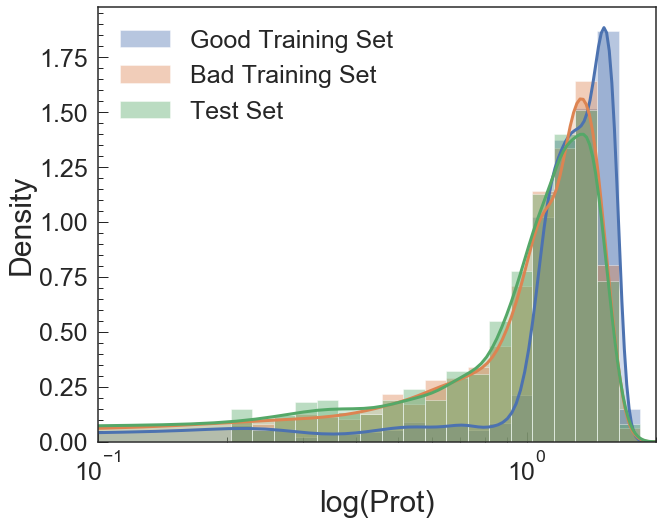

In [131]:
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

Mc_Gar_Sant=pd.read_pickle('Mc_Gar_Sant')

plt.figure(figsize=(10,8))
binslen=100

badprot=Mc_Gar_Sant.loc[Mc_Gar_Sant['KID'].isin(df_train.TrainKID_bad)].Prot
goodprot=Mc_Gar_Sant.loc[Mc_Gar_Sant['KID'].isin(df_train.TrainKID_good)].Prot.values
testprot=Mc_Gar_Sant.loc[Mc_Gar_Sant['KID'].isin(df_train.TestKID)].Prot.values

logbins = np.logspace(np.log10(min(goodprot)),np.log10(max(goodprot)),binslen)

sns.distplot(np.log10(goodprot),bins=logbins,hist = True,kde_kws = {'shade': True, 'linewidth': 3},label='Good Training Set')
sns.distplot(np.log10(badprot),bins=logbins,hist = True,kde_kws = {'shade': True, 'linewidth': 3},label='Bad Training Set')
sns.distplot(np.log10(testprot),bins=logbins,hist = True,kde_kws = {'shade': True, 'linewidth': 3},label='Test Set')

#plt.hist(goodprot,bins=logbins,alpha=0.5,color='black',label='Good Training Set')
#plt.hist(badprot,bins=logbins,alpha=0.5,label='Bad Training Set')
#plt.hist(testprot,alpha=0.5,bins=logbins,label='Test Set')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('log(Prot)')
#plt.ylabel('Star Counts')
plt.ylabel('Density')
plt.xlim([1e-1,2])
plt.legend()

Trained RF 50 times with 50 different Rvar_27. One only trained on Prot>20 day and one trained on all Prots.

/Users/lucy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Average MRE for Prots>20days is 0.111 +/- 0.003
Average average chisq for Prots>20days is 102.86 +/- 9.30
Average MRE for all Prot is 0.218 +/- 0.005
Average average chisq for all Prots is 1780.10 +/- 216.38


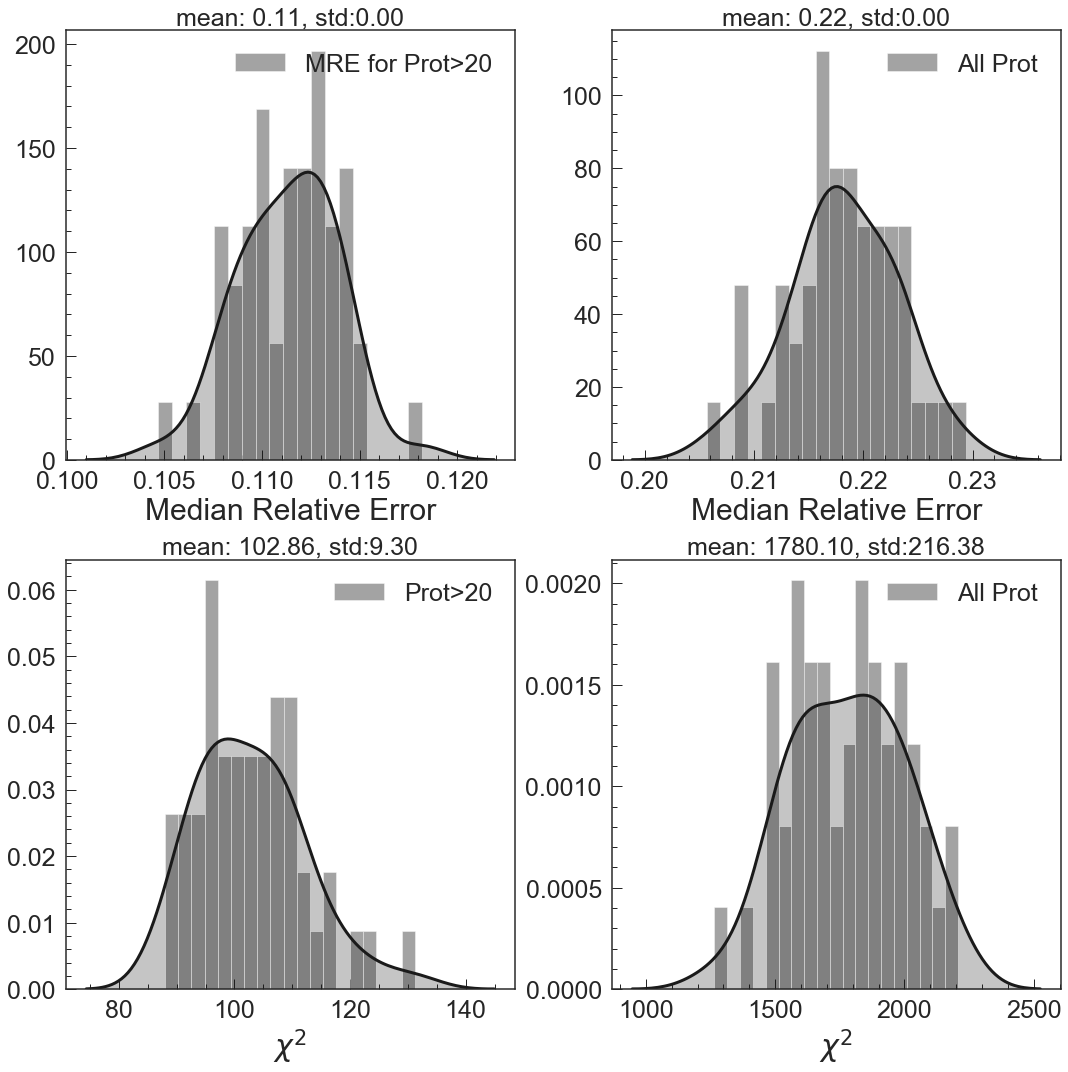

In [118]:
df=pd.read_pickle('Rvar27Tests.pkl')
MRE_om=np.zeros((2,50))
chisq_om=np.zeros((2,50))
# for all Prots
MRE_om[1,:]=df['MRE'].values
chisq_om[1,:]=df['AverageChisq'].values
# for Prots>20 days
MRE_om[0,:]=df['MRE_lp'].values
chisq_om[0,:]=df['AverageChisq_lp'].values

plothistograms(MRE_om,chisq_om,20)
plt.tight_layout()

Trained RF one time with one Rvar (all cool stars from santos) and tested on Prot>20 day and all Prots.

/Users/lucy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Average MRE for Prots>20days is 0.128 +/- 0.006
Average average chisq for Prots>20days is 159.47 +/- 9.08
Average MRE for all Prot is 0.196 +/- 0.007
Average average chisq for all Prots is 1579.99 +/- 52.28


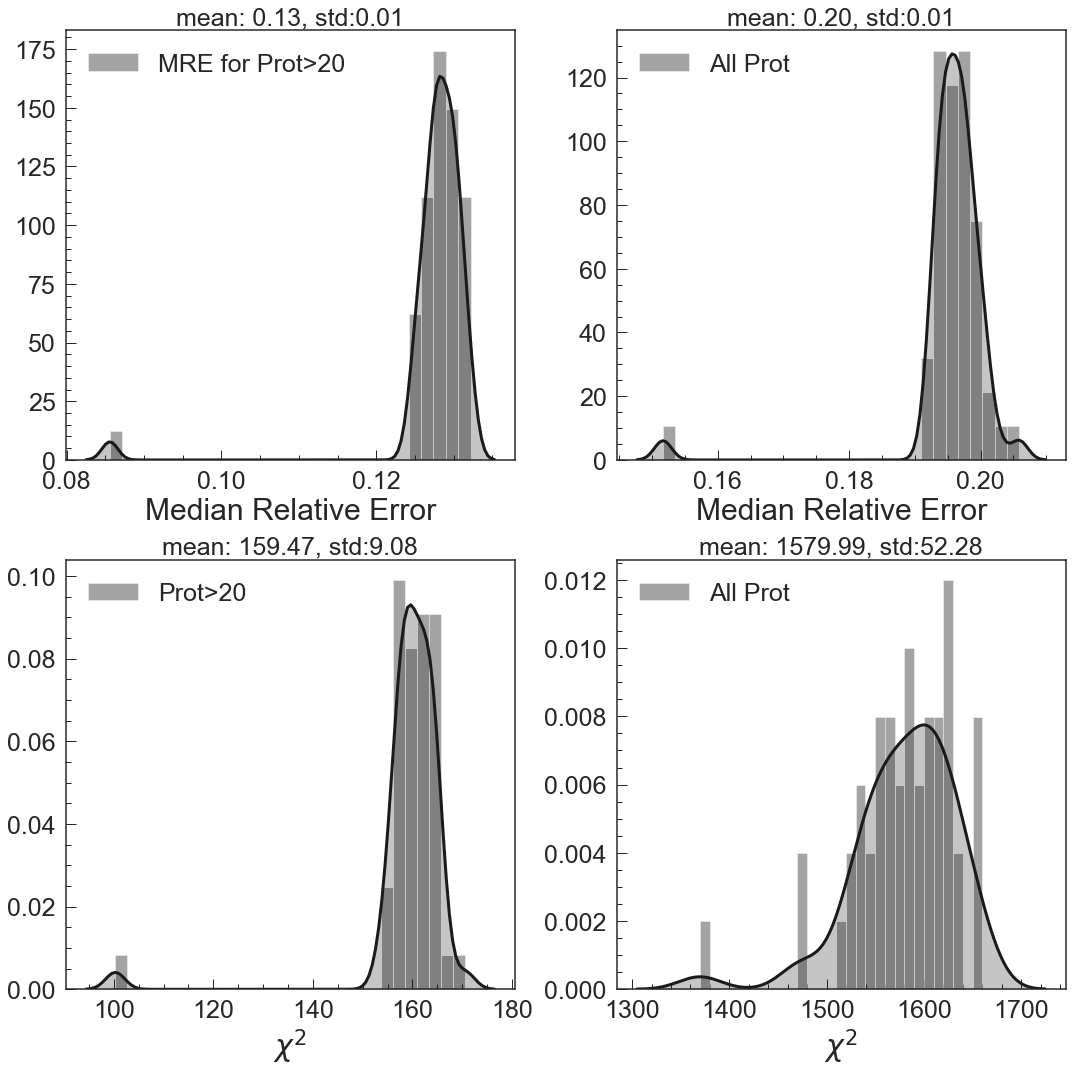

In [119]:
df=pd.read_pickle('Rvar27Tests_TrainedOnce.pkl')
MRE_om=np.zeros((2,50))
chisq_om=np.zeros((2,50))
# for Prots>20 days
MRE_om[0,:]=df['MRE_lp'].values
chisq_om[0,:]=df['AverageChisq_lp'].values
# for all Prots
MRE_om[1,:]=df['MRE'].values
chisq_om[1,:]=df['AverageChisq'].values

plothistograms(MRE_om,chisq_om,30)
plt.tight_layout()